In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [26]:
# X,y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)
X,y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)

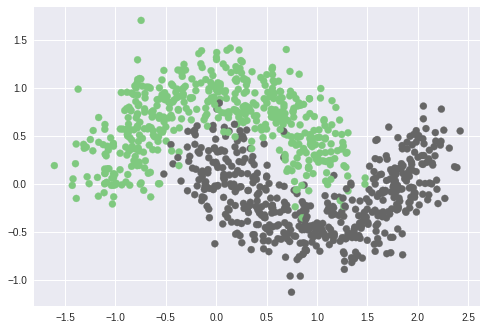

In [27]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [28]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))

def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,y,weights):
    y_ = predict(X,weights)
    cost = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
    return cost

def update(X,y,weights,learning_rate):
    y_ = predict(X,weights)
    dw = np.dot(X.T,y_-y)
    m = X.shape[0]
    weights = weights-learning_rate*dw/(float(m))
    return weights
def train(X,y,learning_rate=0.5,maxepochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxepochs):
        weights = update(X,y,weights,learning_rate)
        if epoch%10==0:
            l = loss(X,y,weights)
            print("epoch at %d loss is %.4f"%(epoch,l))
    return weights
def get_predictions(X_test,weights,labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X.shape[0],1))
        X_test = np.hstack((ones,X_test))
    probs = predict(X_test,weights)
    if not labels:
        return probs
    else:
        y_ = np.zeros(probs.shape)
        y_[probs>=0.5] = 1
        return y_
def score(X_test,y_test,weights):
    y_ = get_predictions(X_test,weights,labels=True)
    acc= np.mean(y_test == y_)
    return acc

In [29]:
weights = train(X,y,learning_rate=0.8,maxepochs=1000)

epoch at 0 loss is 0.6234
epoch at 10 loss is 0.4134
epoch at 20 loss is 0.3672
epoch at 30 loss is 0.3457
epoch at 40 loss is 0.3327
epoch at 50 loss is 0.3239
epoch at 60 loss is 0.3175
epoch at 70 loss is 0.3128
epoch at 80 loss is 0.3091
epoch at 90 loss is 0.3063
epoch at 100 loss is 0.3041
epoch at 110 loss is 0.3023
epoch at 120 loss is 0.3009
epoch at 130 loss is 0.2997
epoch at 140 loss is 0.2988
epoch at 150 loss is 0.2980
epoch at 160 loss is 0.2973
epoch at 170 loss is 0.2968
epoch at 180 loss is 0.2963
epoch at 190 loss is 0.2959
epoch at 200 loss is 0.2956
epoch at 210 loss is 0.2953
epoch at 220 loss is 0.2951
epoch at 230 loss is 0.2949
epoch at 240 loss is 0.2947
epoch at 250 loss is 0.2946
epoch at 260 loss is 0.2944
epoch at 270 loss is 0.2943
epoch at 280 loss is 0.2942
epoch at 290 loss is 0.2941
epoch at 300 loss is 0.2941
epoch at 310 loss is 0.2940
epoch at 320 loss is 0.2940
epoch at 330 loss is 0.2939
epoch at 340 loss is 0.2939
epoch at 350 loss is 0.2938
epo

In [30]:
get_predictions(X,weights)

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [31]:
score(X,y,weights)

0.869

In [37]:
x1 = np.linspace(-2,3,20)
x2 = -(weights[0]+weights[1]*x1)/weights[2]

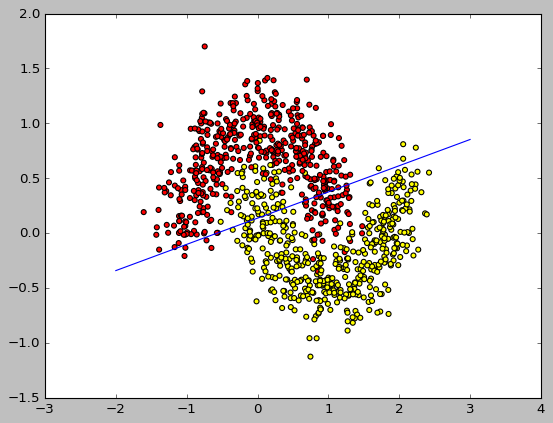

In [38]:
plt.style.use('classic')
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.autumn)
plt.plot(x1,x2)